<a href="https://colab.research.google.com/github/rara-by/Practice-Notebooks/blob/main/Copy_of_S24_AISec_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 1: Feature Engineering for Spam Classification

**Objective:**
Enhance the performance of the spam text message classifier by experimenting with feature engineering techniques. Your task is to compare the effectiveness of different feature representations and their impact on the classifier's performance.

**Instructions:**
1. **Count-Based Features:** Start with the CountVectorizer implementation from the tutorial as your baseline model.
2. **TF-IDF Transformation:**
   - Implement a version of the classifier that uses `TfidfVectorizer` for feature extraction. Analyze how TF-IDF features affect the model's accuracy, precision, recall, and F1 score compared to count-based features. For a one-page description of TF-IDF, [see this reference](https://tfidf.com/).
3. **N-grams:**
   - N-grams are an essential feature extraction technique in natural language processing that capture sequences of 'n' items from text, providing context that individual words (unigrams) alone cannot. By considering contiguous sequences of words, n-grams (where 'n' can be 2 for bi-grams, 3 for tri-grams, etc.) incorporate local word order and can significantly enhance the understanding of text semantics. For instance, in the sentence "The quick brown fox jumps", bi-grams would be sequences like "The quick" and "quick brown", capturing more contextual information than unigrams such as "quick", "brown". This additional context can be particularly valuable in tasks like spam detection, where specific word sequences may strongly indicate spam content. By adjusting the `ngram_range` parameter in text vectorization tools like `CountVectorizer` or `TfidfVectorizer`, one can experiment with the inclusion of n-grams to observe their impact on model performance, potentially improving the detection capabilities of classifiers by leveraging the richer linguistic context n-grams provide.
   -- Implement another version of the classifier that includes bi-grams or tri-grams in the feature set. Adjust the `ngram_range` parameter in either CountVectorizer or TfidfVectorizer and observe the impact on the model's performance.

**Submission Instructions:**
- Submit your solution as a Jupyter Notebook (.IPynb file), as well as a link to your Google Colab notebook. Make sure that your Colab notebook is shared with "anyone with link".
- Your notebook should include sections for each feature engineering strategy, clearly marked with comments or Markdown cells.
- Each section should include the implementation of the feature extraction technique, model training, and evaluation.
- Use accuracy, precision, recall, and F1 score as your evaluation metrics.
- Include a summary section at the end of the notebook comparing the performance of the different feature engineering strategies.

**Evaluation Metrics:**
- Your assignment will be auto-graded based on the following metrics: accuracy, precision, recall, and F1 score. Ensure your notebook outputs these metrics for each model variant in a consistent and easily extractable format.

**Note:** Ensure that each cell in your Jupyter Notebook that outputs the required metrics for auto-grading does so in a clear and consistent format. For instance, consider printing the metrics in a dictionary format:

```python
print({"CountVectorizer -- Accuracy": accuracy, "CountVectorizer -- Precision": precision, "CountVectorizer -- Recall": recall, "CountVectorizer -- F1 Score": f1})

print({"TFIDF -- Accuracy": accuracy, "TFIDF -- Precision": precision, "TFIDF -- Recall": recall, "TFIDF -- F1 Score": f1})

print({"NGRAM -- Accuracy": accuracy, "NGRAM -- Precision": precision, "NGRAM -- Recall": recall, "NGRAM -- F1 Score": f1})
```

This structure will help streamline the auto-grading process, ensuring that your submission can be evaluated efficiently and accurately.

**Skeleton Code for the Assignment:**

In [ ]:
```python
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
# df = pd.read_csv('path_to_dataset.csv')

# Split the dataset
# X = df['text']
# y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline: CountVectorizer
# vectorizer = CountVectorizer()
# Implement your CountVectorizer feature extraction, model training, and evaluation here

# TF-IDF Transformation
# tfidf_vectorizer = TfidfVectorizer()
# Implement your TfidfVectorizer feature extraction, model training, and evaluation here

# N-grams
# ngram_vectorizer = CountVectorizer(ngram_range=(1, 2)) # Example for using bi-grams
# Implement your N-gram feature extraction, model training, and evaluation here

# Summary
# Compare the performance metrics of the different feature engineering strategies and summarize your findings.
```


Count-based features

In [35]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/UNHSAILLab/S24-AISec/main/M03%20-%20Spam%20and%20Phish%20Detection/SMS-Dataset.csv')

In [37]:
# EDA
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
# Split the dataset
X = df['Message']
y = df['Category']
print(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object


In [39]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4457,) (1115,) (4457,) (1115,)


In [40]:
# Baseline: CountVectorizer
vectorizer = CountVectorizer()
# Implement your CountVectorizer feature extraction, model training, and evaluation here
vectorized_X_train = vectorizer.fit_transform(X_train)

# Initializing and training the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')
# liblinear updates one parameter at a time, max_iter doesn't mean anything here
logistic_model.fit(vectorized_X_train, y_train)

# Predicting the Test set results
vectorized_X_test = vectorizer.transform(X_test)
y_pred = logistic_model.predict(vectorized_X_test)

# Evaluating the model using accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9865470852017937


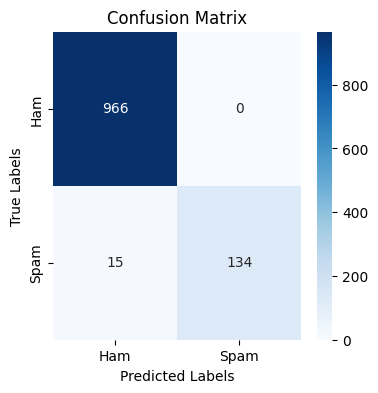

Precision: 1.0000
Recall: 0.8993
F1 Score: 0.9470


In [41]:
#evaluation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1 score, specifying 'spam' as the positive class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='spam')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [42]:
print({"CountVectorizer -- Accuracy": accuracy, "CountVectorizer -- Precision": precision, "CountVectorizer -- Recall": recall, "CountVectorizer -- F1 Score": f1})

{'CountVectorizer -- Accuracy': 0.9865470852017937, 'CountVectorizer -- Precision': 1.0, 'CountVectorizer -- Recall': 0.8993288590604027, 'CountVectorizer -- F1 Score': 0.9469964664310955}


TF-IDF Transformation

In [43]:
# Implement your TfidfVectorizer feature extraction, model training, and evaluation here
tfidf_vectorizer = TfidfVectorizer()

vectorized_X_train = tfidf_vectorizer.fit_transform(X_train)

# Initializing and training the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')
# liblinear updates one parameter at a time, max_iter doesn't mean anything here
logistic_model.fit(vectorized_X_train, y_train)

# Predicting the Test set results
vectorized_X_test = tfidf_vectorizer.transform(X_test)
y_pred = logistic_model.predict(vectorized_X_test)

# Evaluating the model using accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9748878923766816


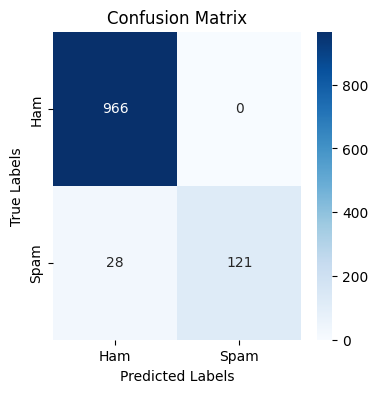

Precision: 1.0000
Recall: 0.8121
F1 Score: 0.8963


In [44]:
#evaluation
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1 score, specifying 'spam' as the positive class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='spam')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [45]:
print({"TFIDF -- Accuracy": accuracy, "TFIDF -- Precision": precision, "TFIDF -- Recall": recall, "TFIDF -- F1 Score": f1})

{'TFIDF -- Accuracy': 0.9748878923766816, 'TFIDF -- Precision': 1.0, 'TFIDF -- Recall': 0.8120805369127517, 'TFIDF -- F1 Score': 0.8962962962962964}


N-grams

In [46]:
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2)) # Example for using bi-grams

# Implement your N-gram feature extraction, model training, and evaluation here
vectorized_X_train = ngram_vectorizer.fit_transform(X_train)

# Initializing and training the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')
# liblinear updates one parameter at a time, max_iter doesn't mean anything here
logistic_model.fit(vectorized_X_train, y_train)

# Predicting the Test set results
vectorized_X_test = ngram_vectorizer.transform(X_test)
y_pred = logistic_model.predict(vectorized_X_test)

# Evaluating the model using accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9838565022421525


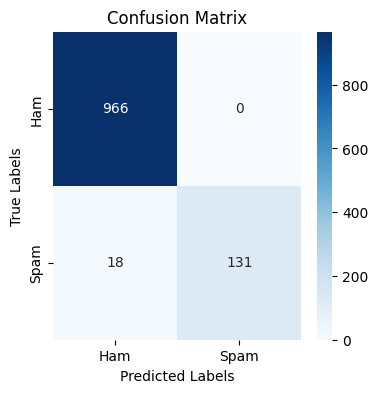

Precision: 1.0000
Recall: 0.8792
F1 Score: 0.9357


In [47]:
#evaluation
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1 score, specifying 'spam' as the positive class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='spam')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [48]:
print({"NGRAM -- Accuracy": accuracy, "NGRAM -- Precision": precision, "NGRAM -- Recall": recall, "NGRAM -- F1 Score": f1})

{'NGRAM -- Accuracy': 0.9838565022421525, 'NGRAM -- Precision': 1.0, 'NGRAM -- Recall': 0.8791946308724832, 'NGRAM -- F1 Score': 0.9357142857142857}


Summary

Feature Extractor | Accuracy | Precision | Recall | F1 Score
------------------|----------|-----------|--------|---------
Count-based       |0.9865 | 1.0000 | 0.8993 | 0.9470
TF-IDF |  0.9748 | 1.0000 | 0.8121 | 0.8963
Bigram | 0.9838 | 1.0000 | 0.8792 | 0.9357

In this study the count-based approach outperforms TF-IDF and Bigram feature extraction methods in every evaluation metric. It appears that for this specific case the order of words does not provide any additional context for the classifier.